In [7]:
pip install pandas matplotlib seaborn scikit-learn jupyterlab

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached httpcore-1.0.9-py3-none-any.whl.metadata (21 kB)
  Using cached h11-0.16.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached jsonschema-4.25.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached jsonschema_specifications-2025.4.1-py3-none-any.whl.metadata (2.9 kB)
  Using ca

'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no

In [8]:
import pandas as pd
print(pd.__version__)


2.3.2


In [12]:

%pip install flask streamlit -q

Note: you may need to restart the kernel to use updated packages.


'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [13]:
# --------------------- Personalized Healthcare Recommendations ---------------------

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from flask import Flask, request, jsonify
import streamlit as st

In [16]:
# --------------------- Load Dataset ---------------------
# Dataset: CSV with columns including demographics, vitals, lifestyle, lab results
# Correcting the file path to load data from the Colab environment
data = pd.read_csv("D:\\Personalized-healthcare-recommendation\\blood.csv")

In [17]:
# Explore dataset
print(data.head())
print(data.describe())
print(data['Class'].value_counts())

   Recency  Frequency  Monetary  Time  Class
0        2         50     12500    99      1
1        0         13      3250    28      1
2        1         17      4000    36      1
3        2         20      5000    45      1
4        1         24      6000    77      0
          Recency   Frequency      Monetary        Time       Class
count  748.000000  748.000000    748.000000  748.000000  748.000000
mean     9.506684    5.516043   1378.676471   34.284759    0.237968
std      8.095396    5.841825   1459.826781   24.380307    0.426124
min      0.000000    1.000000    250.000000    2.000000    0.000000
25%      2.750000    2.000000    500.000000   16.000000    0.000000
50%      7.000000    4.000000   1000.000000   28.000000    0.000000
75%     14.000000    7.000000   1750.000000   50.000000    0.000000
max     74.000000   50.000000  12500.000000   99.000000    1.000000
Class
0    570
1    178
Name: count, dtype: int64


In [18]:
print(data.columns)


Index(['Recency', 'Frequency', 'Monetary', 'Time', 'Class'], dtype='object')


In [19]:
# --------------------- Preprocess the data ---------------------
X = data.drop('Class', axis=1)  # Features
y = data['Class']               # Target

numerical_features = ['Recency', 'Frequency', 'Monetary', 'Time']
categorical_features = []  # None in this dataset


In [20]:
# Numerical pipeline
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [21]:
# Column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_features)
])

In [22]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [23]:
# --------------------- Model Selection & Training ---------------------
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}


param_grids = {
    'RandomForest': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 5, 10]
    },
    'GradientBoosting': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.05, 0.1],
        'classifier__max_depth': [3, 5]
    }
}

best_model_pipeline = None
best_score = 0
best_model_name = ''


for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    grid = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='roc_auc')
    grid.fit(X_train, y_train)

    print(f"\nBest parameters for {model_name}: {grid.best_params_}")
    print(f"Best CV AUC for {model_name}: {grid.best_score_:.4f}")

    if grid.best_score_ > best_score:
        best_score = grid.best_score_
        best_model_pipeline = grid.best_estimator_
        best_model_name = model_name

print(f"\nSelected Model: {best_model_name} with CV AUC: {best_score:.4f}")


Best parameters for RandomForest: {'classifier__max_depth': 5, 'classifier__n_estimators': 200}
Best CV AUC for RandomForest: 0.7117

Best parameters for GradientBoosting: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Best CV AUC for GradientBoosting: 0.7043

Selected Model: RandomForest with CV AUC: 0.7117


In [24]:
# --------------------- Model Evaluation ---------------------
y_pred = best_model_pipeline.predict(X_test)
y_proba = best_model_pipeline.predict_proba(X_test)[:, 1]


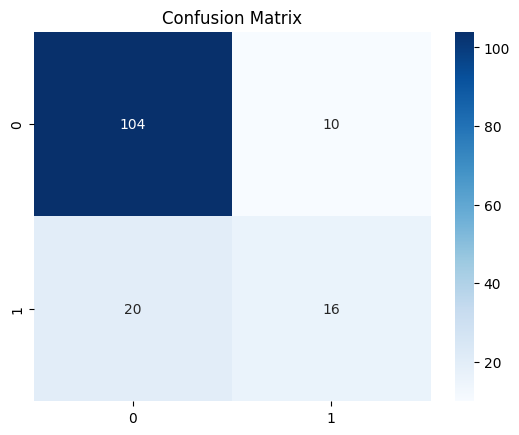

In [25]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [26]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       114
           1       0.62      0.44      0.52        36

    accuracy                           0.80       150
   macro avg       0.73      0.68      0.70       150
weighted avg       0.79      0.80      0.79       150




Test ROC-AUC: 0.7809


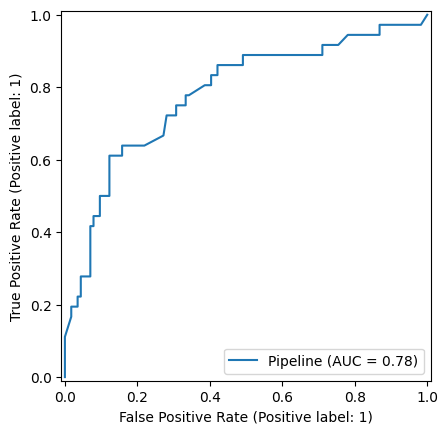

In [27]:
# ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"\nTest ROC-AUC: {roc_auc:.4f}")
RocCurveDisplay.from_estimator(best_model_pipeline, X_test, y_test)
plt.show()

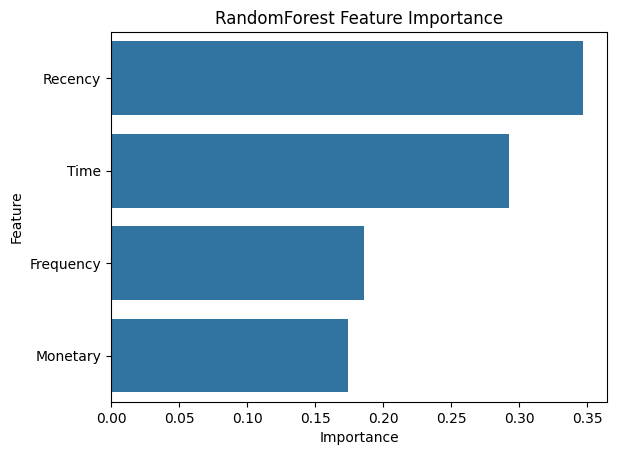

In [28]:
# Feature importance (tree-based models)
if best_model_name in ['RandomForest', 'GradientBoosting']:
    importances = best_model_pipeline.named_steps['classifier'].feature_importances_
    feature_df = pd.DataFrame({'Feature': numerical_features, 'Importance': importances})
    feature_df = feature_df.sort_values(by='Importance', ascending=False)
    sns.barplot(x='Importance', y='Feature', data=feature_df)
    plt.title(f"{best_model_name} Feature Importance")
    plt.show()

In [29]:
# --------------------- Recommendation Function ---------------------
def generate_recommendations(patient_data):
    prediction = best_model_pipeline.predict(patient_data)
    mapping = {
        0: "No immediate action needed",
        1: "Regular monitoring or intervention required"
    }
    return mapping[prediction[0]]

In [30]:
# Example patient
example_patient = pd.DataFrame({
    'Recency': [2],
    'Frequency': [20],
    'Monetary': [5000],
    'Time': [50]
})
print("Recommendation for example patient:", generate_recommendations(example_patient))

Recommendation for example patient: Regular monitoring or intervention required


In [ ]:
# --------------------- Flask Deployment ---------------------
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data_json = request.get_json(force=True)
    patient_df = pd.DataFrame([data_json])
    recommendation = generate_recommendations(patient_df)
    return jsonify({'recommendation': recommendation})

if __name__ == '__main__':
    app.run(debug=True)

In [32]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.


In [33]:
%pip install plotly matplotlib seaborn joblib

  Using cached plotly-6.3.0-py3-none-any.whl.metadata (8.5 kB)
Using cached plotly-6.3.0-py3-none-any.whl (9.8 MB)
Note: you may need to restart the kernel to use updated packages.


'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
